 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [48]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [49]:
# Reading whale returns
csvpath = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(csvpath, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [50]:
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [51]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [52]:
# Drop nulls
whale_returns = whale_returns.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [53]:
# Reading algorithmic returns
csvpath = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(csvpath, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [54]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [55]:
# Drop nulls
algo_returns = algo_returns.dropna()

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [56]:
# Reading S&P 500 Closing Prices
csvpath = Path("Resources/sp500_history.csv")
sp500_data = pd.read_csv(csvpath, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [57]:
sp500_data.isnull().sum()

Close    0
dtype: int64

In [58]:
# Check Data Types
sp500_data.dtypes

Close    object
dtype: object

In [59]:
# Fix Data Types
sp500_data["Close"]= sp500_data["Close"].str.replace("$", "")
sp500_data["Close"]= sp500_data["Close"].str.replace(",", "").astype("float")

sp500_data = sp500_data.sort_index(ascending=True)
sp500_data.head()

<ipython-input-59-66443eb0a919>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_data["Close"]= sp500_data["Close"].str.replace("$", "")


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [60]:
# Calculate Daily Returns
sp500_data['Close'] = sp500_data['Close'].pct_change()


In [61]:
# Drop nulls
sp500_data = sp500_data.dropna()
sp500_data.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [62]:
# Rename `Close` Column to be specific to this portfolio.
sp500_data = sp500_data.rename(columns={'Close': 'SP500 Close'})
sp500_data.tail()

,SP500 Close
Date,
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579
2019-04-22,0.001012
2019-04-23,0.008841


## Combine Whale, Algorithmic, and S&P 500 Returns

In [63]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns, algo_returns, sp500_data], axis='columns', join='inner')

In [64]:
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

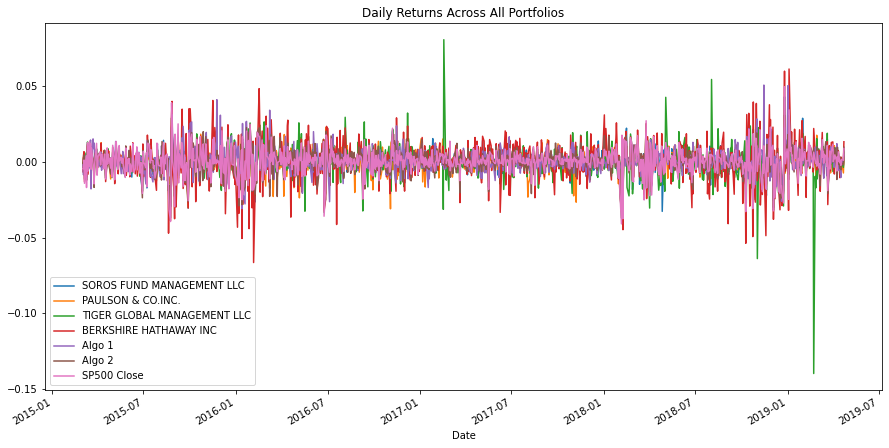

In [65]:
# Plot daily returns of all portfolios

combined_returns.plot(title="Daily Returns Across All Portfolios", figsize=(15,7.5));

#### Calculate and Plot cumulative returns.

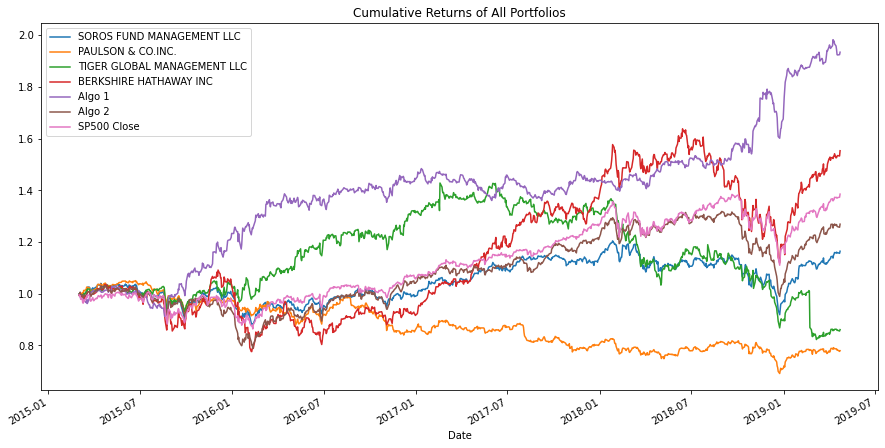

In [66]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns).cumprod()
cumulative_returns.head()
# Plot cumulative returns
cumulative_returns.plot(title="Cumulative Returns of All Portfolios", figsize=(15,7.5));

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


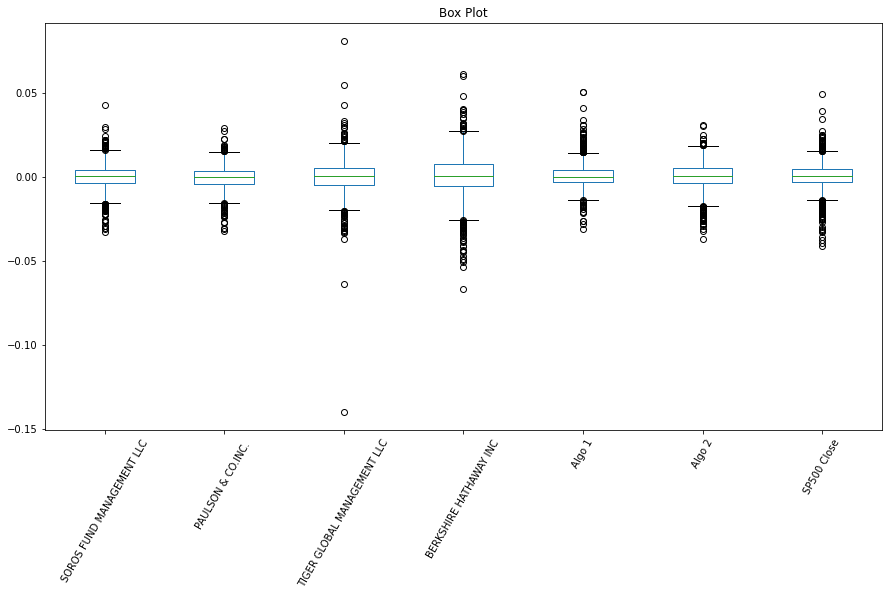

In [67]:
# Box plot to visually show risk
combined_returns.plot.box(figsize=(15,7.5), title="Box Plot", rot=60);

### Calculate Standard Deviations

In [68]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_returns.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500 Close                    0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [69]:
# Calculate  the daily standard deviation of S&P 500
combined_returns['SP500 Close']

# Determine which portfolios are riskier than the S&P 500
combined_returns.std() > combined_returns['SP500 Close'].std()

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
SP500 Close                    False
dtype: bool

### Calculate the Annualized Standard Deviation

In [70]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std.head()

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

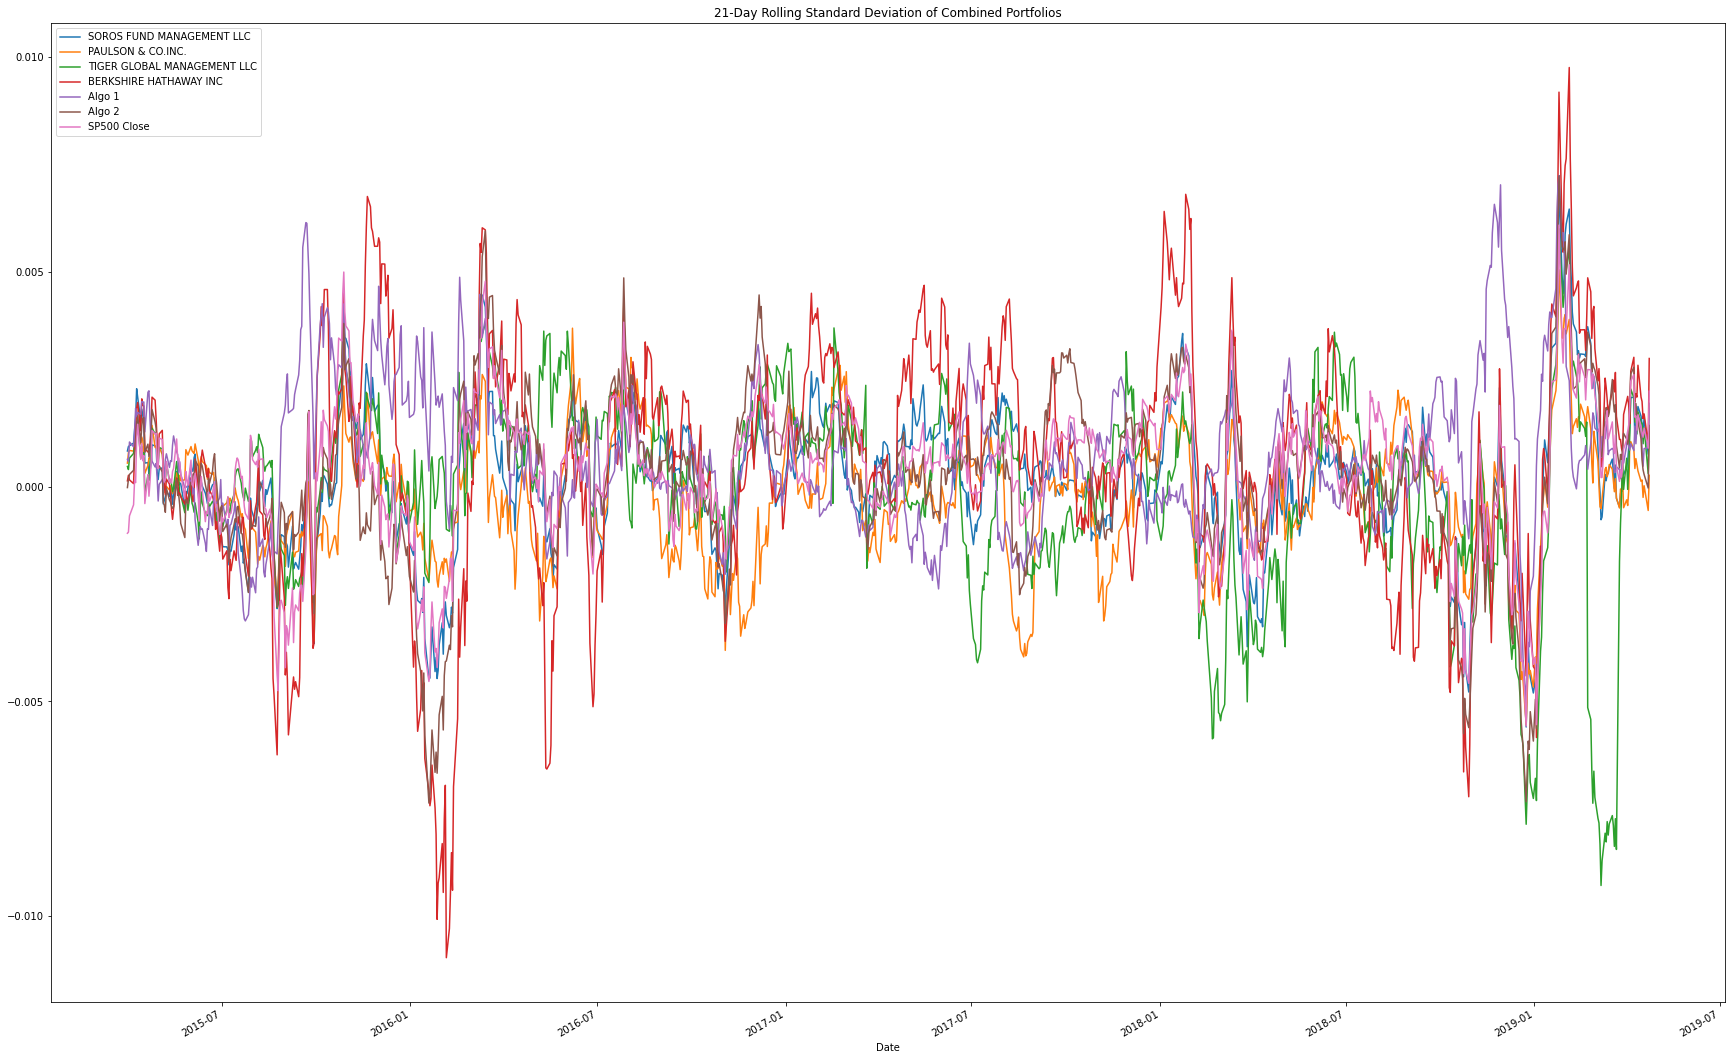

In [71]:
# Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
combined_returns.rolling(window=21).mean().plot(title="21-Day Rolling Standard Deviation of Combined Portfolios", figsize=(30,20));


### Calculate and plot the correlation

In [72]:
# Calculate the correlation
correlation = combined_returns.corr()
# Display de correlation matrix

correlation.style.background_gradient(cmap='winter')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500 Close,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

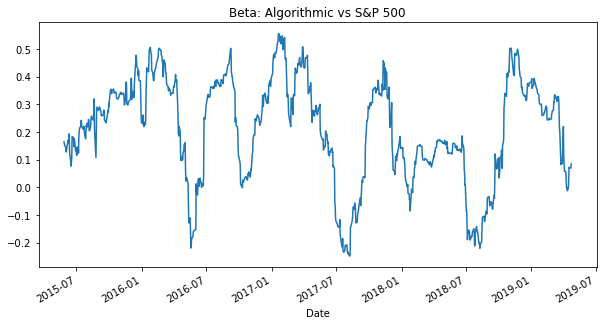

In [73]:
# Calculate covariance of a single portfolio

covariance = combined_returns["Algo 1"].rolling(window=60).cov(combined_returns["SP500 Close"])

# Calculate variance of S&P 500
variance = combined_returns['SP500 Close'].rolling(60).var()
variance

# Computing beta
beta = covariance / variance

# Plot beta trend
beta.plot(figsize=(10,5), title="Beta: Algorithmic vs S&P 500");

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [74]:
# Use `ewm` to calculate the rolling window
combined_returns.ewm(com=0.5).mean()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.001356,0.001186,-0.002024,0.001518,-0.006927,0.001575,-0.004426
2015-03-05,0.003198,0.003187,0.001007,0.005124,-0.002793,0.003478,-0.000534
2015-03-06,-0.004297,-0.001377,-0.005397,-0.007176,-0.004253,-0.006606,-0.009741
2015-03-09,-0.001031,0.002373,0.002127,-0.003478,-0.005052,-0.001311,-0.000580
...,...,...,...,...,...,...,...
2019-04-16,0.002055,-0.000123,-0.000159,-0.001206,-0.005956,0.001263,0.000705
2019-04-17,-0.001246,-0.004352,-0.002993,0.001746,-0.008853,-0.003065,-0.001281
2019-04-18,0.000550,-0.000636,-0.000610,0.001859,-0.003343,-0.001841,0.000626


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [75]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))


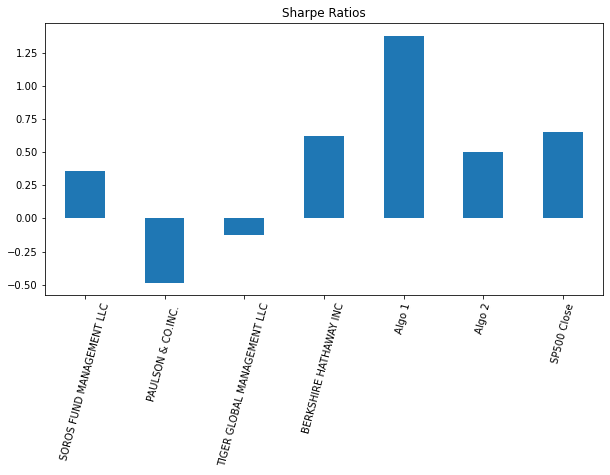

In [76]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(figsize=(10,5), kind="bar", title="Sharpe Ratios", rot=75);

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

The diverse set of portfolios analyzed provides an interesting perspective on performance. While the S&P 500 is widely used as the benchmark for performance, the algorithmic portfolios outperformed the index. Looking at the chart of "Cumulative Returns of All Portfolios", we can see that the Algo 1 portfolio is the clear winner significantly outperforming all other portfolios.

Tiger Global and Berkshire Hathaway are riskier investments compared to the S&P 500 and the Algorithmic portfolios based on their standard deviations. Being the whale portfolios, one would think they would outperform the rest. However, based on the analysis, the algorithmic portfolios produced the best returns with less risk overall relative to the selected portfolios in the analysis.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [77]:
# Reading data from 1st stock
csvpath = Path("Resources/aapl_historical.csv")
aapl_data = pd.read_csv(csvpath, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)

In [78]:
# Reading data from 2nd stock
csvpath = Path("Resources/cost_historical.csv")
cost_data = pd.read_csv(csvpath, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)

In [79]:
# Reading data from 3rd stock
csvpath = Path("Resources/goog_historical.csv")
goog_data = pd.read_csv(csvpath, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)

In [80]:
# Combine all stocks in a single DataFrame
custom_combined = pd.concat([aapl_data, cost_data, goog_data], axis="rows", join="inner")
custom_combined.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [81]:
# Reset Date index
custom_combined = custom_combined.reset_index()

In [82]:
custom_combined.head()

,Trade DATE,Symbol,NOCP
0,2019-05-09,AAPL,200.72
1,2019-05-08,AAPL,202.90
2,2019-05-07,AAPL,202.86
3,2019-05-06,AAPL,208.48
4,2019-05-03,AAPL,211.75


In [83]:
# Reorganize portfolio data by having a column per symbol
portfolio = custom_combined.pivot_table(values='NOCP',index='Trade DATE',columns='Symbol')
portfolio.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [84]:
# Calculate daily returns
daily_returns = portfolio.pct_change()

daily_returns = daily_returns.dropna().copy()

daily_returns.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [85]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)

# Display sample data
portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [86]:
# Join your returns DataFrame to the original returns DataFrame
combined_returns['Custom'] = portfolio_returns

combined_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close,Custom
Date,,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,0.011959


In [87]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_returns = combined_returns.dropna()
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close,Custom
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [88]:
# Calculate the annualized `std`
daily_std = combined_returns.std()

annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
SP500 Close                    0.152054
Custom                         0.211496
dtype: float64

### Calculate and plot rolling `std` with 21-day window

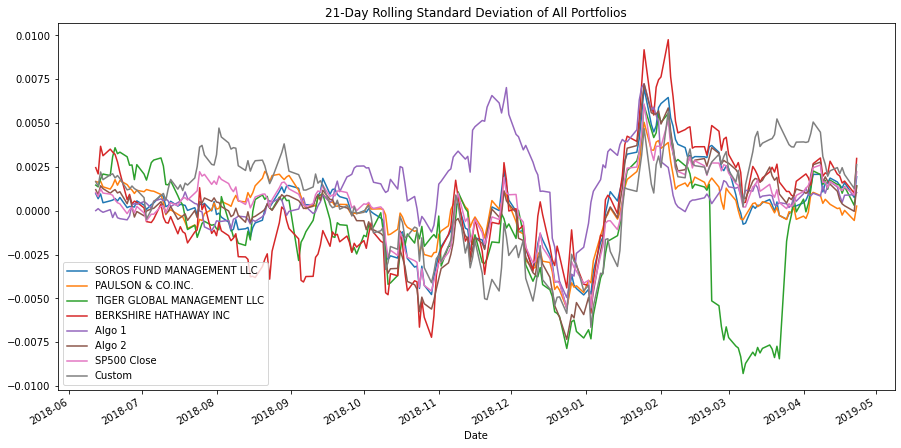

In [89]:
# Calculate and plot rolling standard deviation
combined_returns.rolling(window=21).mean().plot(title="21-Day Rolling Standard Deviation of All Portfolios", figsize=(15,7.5));


### Calculate and plot the correlation

In [90]:
# Calculate and plot the correlation
correlation = combined_returns.corr()
# correlation.plot(figsize=(10,5), title="Correlation of All Portfolios", rot=75);
correlation.style.background_gradient(cmap='summer')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.733250
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.644210
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.739936
SP500 Close,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.871875
Custom,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

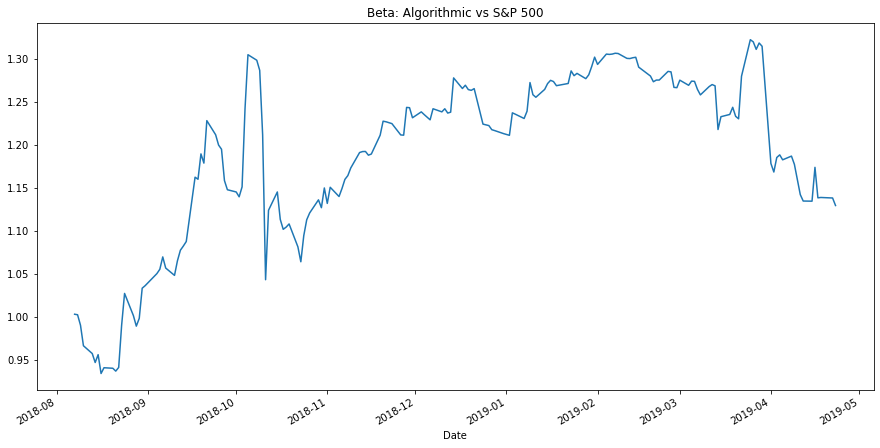

In [91]:
# Calculate and plot Beta

covariance = combined_returns["Custom"].rolling(window=60).cov(combined_returns["SP500 Close"])

# Calculate variance of S&P 500
variance = combined_returns['SP500 Close'].rolling(window=60).var()
variance

# Computing beta
beta = covariance / variance

# Plot beta trend
beta.plot(figsize=(15,7.5), title="Beta: Algorithmic vs S&P 500");


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [92]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios_custom = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))


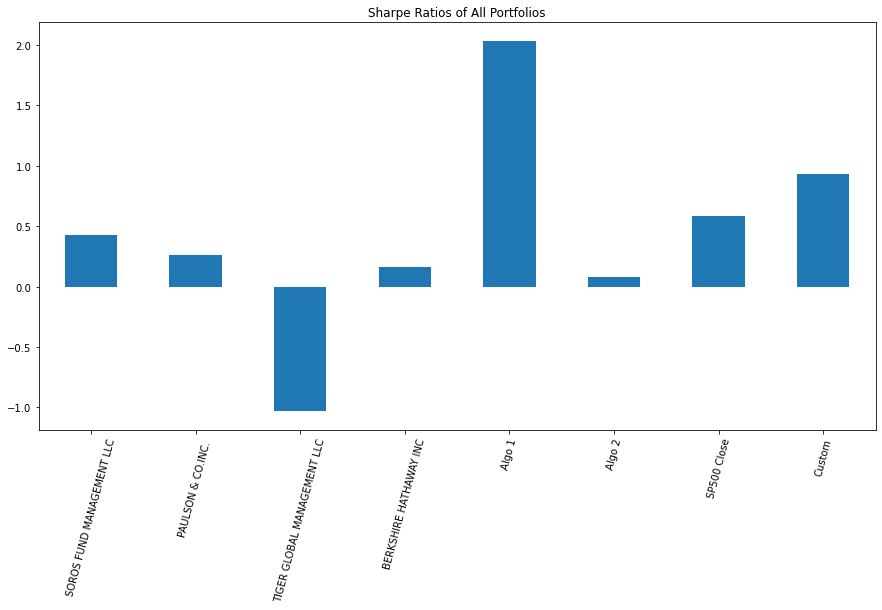

In [93]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_custom.plot(kind='bar', figsize=(15,7.5), title="Sharpe Ratios of All Portfolios", rot=75);

### How does your portfolio do?

The custom portfolio performed well outperforming most portfolios including the S&P 500. While the Custom portfolio performed well, it did not outperform Algo 1 proving that this algorithmic portfolio had the best allocation in the time period analyzed. 